In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
results = pd.read_table(r"/work3/s220672/ORF_prediction/training_results", delimiter = ",")
results.head()

,Epoch,Training Loss,Training Accuracy,Validation Loss,Validation Accuracy,Learning Rate,Weight Decay,Batch Size,Data Input,beta1,beta2
0,17,1.791648,0.180833,1.791178,0.211313,0.0001,0.00005,120,1000frag_10000orgs_120s,NaN,NaN
1,17,1.784922,0.171667,1.787345,0.167353,0.0001,0.00005,120,1000frag_10000orgs_120s,NaN,NaN
2,17,1.773385,0.227500,1.774585,0.205780,0.0001,0.00005,120,1000frag_10000orgs_120s,NaN,NaN
3,17,1.767266,0.226667,1.758390,0.281214,0.0001,0.00005,120,1000frag_10000orgs_120s,NaN,NaN
4,17,1.760260,0.252500,1.746602,0.324062,0.0001,0.00005,120,1000frag_10000orgs_120s,NaN,NaN


In [4]:
import torch

from models.small_cnn import TheOneAndOnly

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Create an instance of the model
model = TheOneAndOnly(channels=6, test=False)

# Define the input shape
input_shape = (6, 30)

# Convert the model to the desired device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
num_parameters = count_parameters(model)

print("Number of parameters:", num_parameters)

Number of parameters: 15736738


In [38]:
import torch
from models.cnn_model import TheOneAndOnly

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Create an instance of the model
model = TheOneAndOnly(channels=6, test=False)

# Define the input shape
input_shape = (6, 30)

# Convert the model to the desired device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
num_parameters = count_parameters(model)

print("Number of parameters:", num_parameters)

Number of parameters: 34884256


In [7]:
epochs = list(range(1, 26))
epochs35 = list(range(1, 36))
bs_50 = results[results["Data Input"] == "6000frags_2000orgs_30nt_50"]["Validation Accuracy"]
bs_60 = results[results["Data Input"] == "6000frags_2000orgs_30nt_60"]["Validation Accuracy"]
bs_70 = results[results["Data Input"] == "6000frags_2000orgs_30nt_small_70"]["Validation Accuracy"]
bs_110 = results[results["Data Input"] == "6000frags_2000orgs_30nt_small_110"]["Validation Accuracy"]
bs_130 = [0.6581764485514485, 0.7010414585414585, 0.7176523476523475, 0.7272599900099901, 0.7333741258741259, 0.7383104395604396, 0.743272977022977, 0.7462310189810191, 0.7510158591408591, 0.7545680569430571, 0.7574248251748252,
0.7613291708291708,
0.7640571928071929,
0.7674826423576424,
0.7711569680319681,
0.7737291458541458,
0.7767785964035964,
0.779633991008991,
0.7828787462537463,
0.7857818431568432,
0.7888987262737265,
0.792421078921079,
0.7943234265734267,
0.797014110889111,
0.8000812937062938]




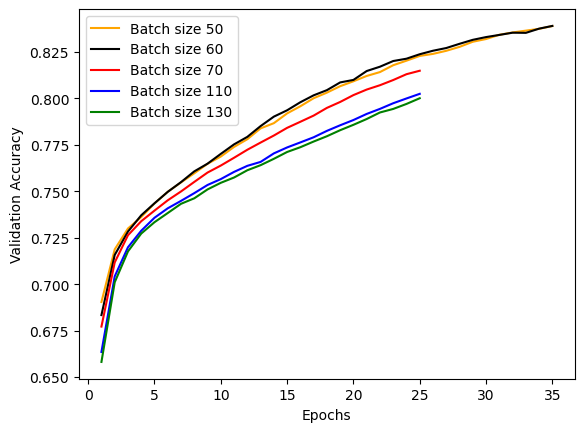

In [8]:
plt.plot(epochs35, bs_50, color='orange', label='Batch size 50')
plt.plot(epochs35, bs_60, color='black', label='Batch size 60')
plt.plot(epochs, bs_70, color='red', label='Batch size 70')
plt.plot(epochs, bs_110, color='blue', label='Batch size 110')
plt.plot(epochs, bs_130, color='green', label='Batch size 130')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
# Adding legend
plt.legend()

In [26]:
b299=results[results["Data Input"] == "6000frags_2000orgs_30nt_small_70"]["Validation Accuracy"] 
b290 = results[results["Data Input"] == "6000frags_2000orgs_30nt_small_70_06_09"]["Validation Accuracy"]
b280 = results[results["Data Input"] == "6000frags_2000orgs_30nt_small_70_06_08"]["Validation Accuracy"]

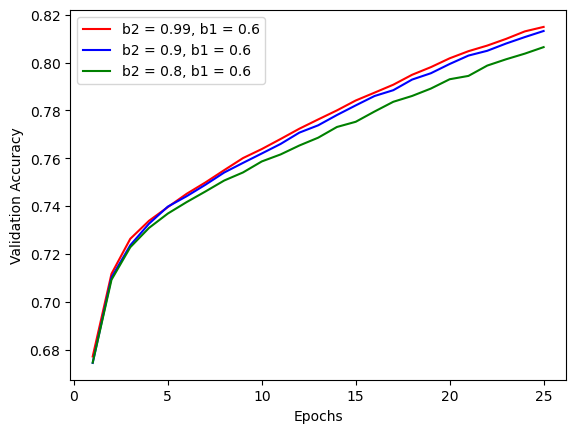

In [27]:
plt.plot(epochs, b299, color='red', label='b2 = 0.99, b1 = 0.6')
plt.plot(epochs, b290, color='blue', label='b2 = 0.9, b1 = 0.6')
plt.plot(epochs, b280, color='green', label='b2 = 0.8, b1 = 0.6')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
# Adding legend
plt.legend()

In [5]:
epochs = list(range(1, 26))
b102 = results[results["Data Input"] == "6000frags_2000orgs_30nt_small_02"]["Validation Accuracy"]
b104 = results[results["Data Input"] == "6000frags_2000orgs_30nt_small_04"]["Validation Accuracy"]
b106 = results[results["Data Input"] == "6000frags_2000orgs_30nt_small_06"]["Validation Accuracy"]
b108 = results[results["Data Input"] == "6000frags_2000orgs_30nt_small_08"]["Validation Accuracy"]
b1095 = results[results["Data Input"] == "6000frags_2000orgs_30nt_small_110"]["Validation Accuracy"]

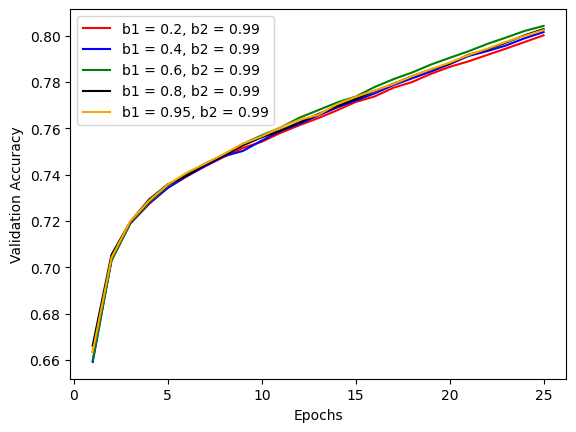

In [29]:
plt.plot(epochs, b102 , color='red', label='b1 = 0.2, b2 = 0.99')
plt.plot(epochs, b104, color='blue', label='b1 = 0.4, b2 = 0.99')
plt.plot(epochs, b106, color='green', label='b1 = 0.6, b2 = 0.99')
plt.plot(epochs, b108, color='black', label='b1 = 0.8, b2 = 0.99')
plt.plot(epochs, b1095, color='orange', label='b1 = 0.95, b2 = 0.99')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
# Adding legend
plt.legend()

Text(0.5, 1.0, 'Complexity of models')

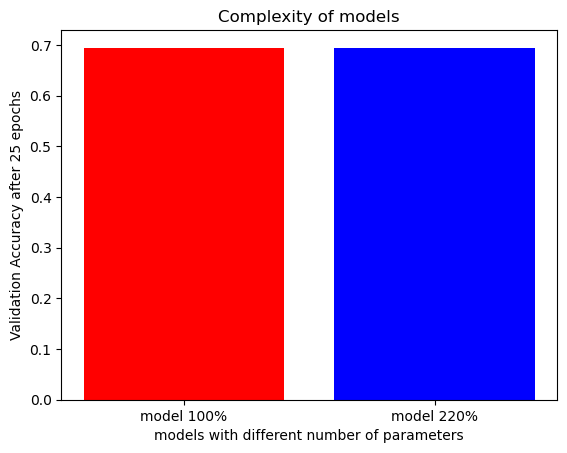

In [14]:
labels = ["model 100%","model 220%"]
val_accuracies = [0.6947112887112887 ,0.6935684315684315]
# Plotting the bar plot
plt.bar(labels, val_accuracies, color=['red', 'blue'],)
### 1000frags_5000orgs
# Adding labels and title
plt.xlabel('models with different number of parameters')
plt.ylabel('Validation Accuracy after 25 epochs')
plt.title('Complexity of models')

In [3]:
epochs = list(range(1, 26))
orgs10000_1000 = results[results["Data Input"] == "1000frags_10000orgs_b10.85_b20.95"]["Validation Accuracy"]
orgs5000_1000 = [0.4688557773067232,
0.5619938807343119,
0.5845042594888613,
0.5958598568171818,
0.6032746870375556,
0.6090032396112466,
0.6141533815942087,
0.6185721313442386,
0.6225703715554134,
0.6266522017357917,
0.630295484541855,
0.6343495980482343,
0.6379946806383233,
0.6415906491221053,
0.6454720233571971,
0.6489906411230653,
0.6526516817981841,
0.6563734751829781,
0.6597502299724034,
0.6631535415750109,
0.666411670599528,
0.6693687557493101,
0.6725796104467464,
0.6752519697636282,
0.6778378594568653
]
orgs2000_6000 = results[results["Data Input"] == "6000frags_2000orgs_again"]["Validation Accuracy"]
orgs2000_4000 = results[results["Data Input"] == "4000frags_2000orgs_30nt_70__"]["Validation Accuracy"]
orgs2000_8000 = results[results["Data Input"] == "8000frags_2000orgs_again"]["Validation Accuracy"]
orgs15000_1000 = results[results["Data Input"] == "1000frag_15000orgs_bs40"]["Validation Accuracy"]
orgs2500_2000 = results[results["Data Input"] == "2000frag_5000orgs_bs70"]["Validation Accuracy"]





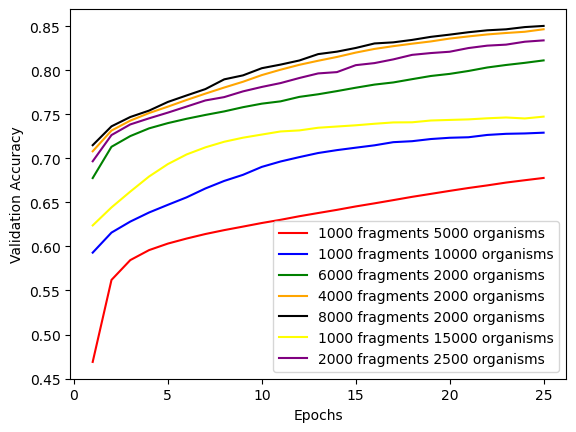

In [5]:
plt.plot(epochs, orgs5000_1000, color='red', label='1000 fragments 5000 organisms')
plt.plot(epochs, orgs10000_1000, color='blue', label='1000 fragments 10000 organisms')
plt.plot(epochs, orgs2000_6000, color='green', label='6000 fragments 2000 organisms')
plt.plot(epochs, orgs2000_4000, color='orange', label='4000 fragments 2000 organisms')
plt.plot(epochs, orgs2000_8000, color='black', label='8000 fragments 2000 organisms')
plt.plot(epochs, orgs15000_1000, color='yellow', label='1000 fragments 15000 organisms')
plt.plot(epochs, orgs2500_2000, color='purple', label='2000 fragments 2500 organisms')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
# Adding legend
plt.legend()

In [35]:
epochs39 = list(range(1, 16))
nucleotides39 = [0.752641,
0.778453,
0.7985130000000001,
0.8171970000000001,
0.832418,
0.842701,
0.850152,
0.856491,
 0.8611850000000001,
0.8652550000000001,
0.8682209999999999,
0.8709819999999999,
0.8723860000000001,
0.874307,
0.876343]

nucleotides36 = results[results["Data Input"] == "6000frags_2000orgs_36nt_true_09_099"]["Validation Accuracy"]
nucleotides33 = results[results["Data Input"] == "6000frags_2000orgs_33nt_true_09_099"]["Validation Accuracy"]
nucleotides30 = bs_110

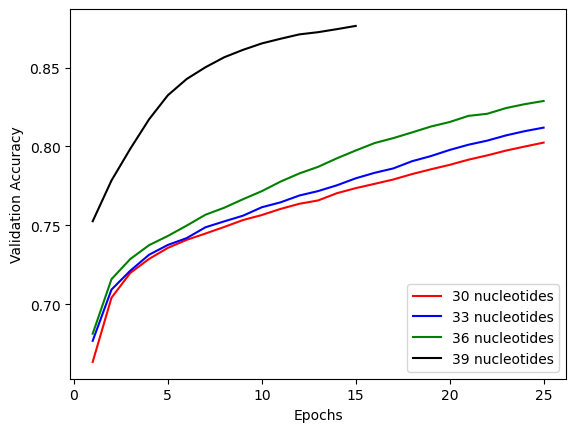

In [36]:
plt.plot(epochs, nucleotides30, color='red', label='30 nucleotides')
plt.plot(epochs, nucleotides33, color='blue', label='33 nucleotides')
plt.plot(epochs, nucleotides36, color='green', label='36 nucleotides')
plt.plot(epochs39, nucleotides39, color='black', label='39 nucleotides')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
# Adding legend
plt.legend()